In [4]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import numpy as np
plt.style.use('default')
sns.set_palette("husl")
with open('Dataset_for_AI.json', 'r', encoding='utf-8') as file:
    data = json.load(file)
metadata = data[0]
dataset_info = {k: v for k, v in metadata.items() if k != 'data'}
all_samples = metadata['data'] + data[1:]
df = pd.DataFrame(all_samples)
df['question_length'] = df['question'].str.len()
df['answer_length'] = df['answer'].str.len()
category_counts = df['category'].value_counts()
intent_counts = df['intent'].value_counts()


all_entities = []
for entities in df['entities']:
    if isinstance(entities, dict):
        all_entities.extend(entities.keys())
entity_counts = Counter(all_entities)

print("📊 STUDENT QUERY CHATBOT DATASET - RIPHAH INTERNATIONAL UNIVERSITY")
print("="*60)
print(f"Dataset Name: {dataset_info.get('dataset_name', 'N/A')}")
print(f"Version: {dataset_info.get('version', 'N/A')}")
print(f"Created: {dataset_info.get('created_date', 'N/A')}")
print(f"Total Samples: {len(df)}")
print(f"Categories: {len(dataset_info.get('categories', []))}")
print(f"Unique Intents: {len(intent_counts)}")
print(f"Entity Types: {len(entity_counts)}")

📊 STUDENT QUERY CHATBOT DATASET - RIPHAH INTERNATIONAL UNIVERSITY
Dataset Name: Student Query Chatbot Training Data
Version: 2.0
Created: 2024-01-20
Total Samples: 550
Categories: 21
Unique Intents: 431
Entity Types: 395


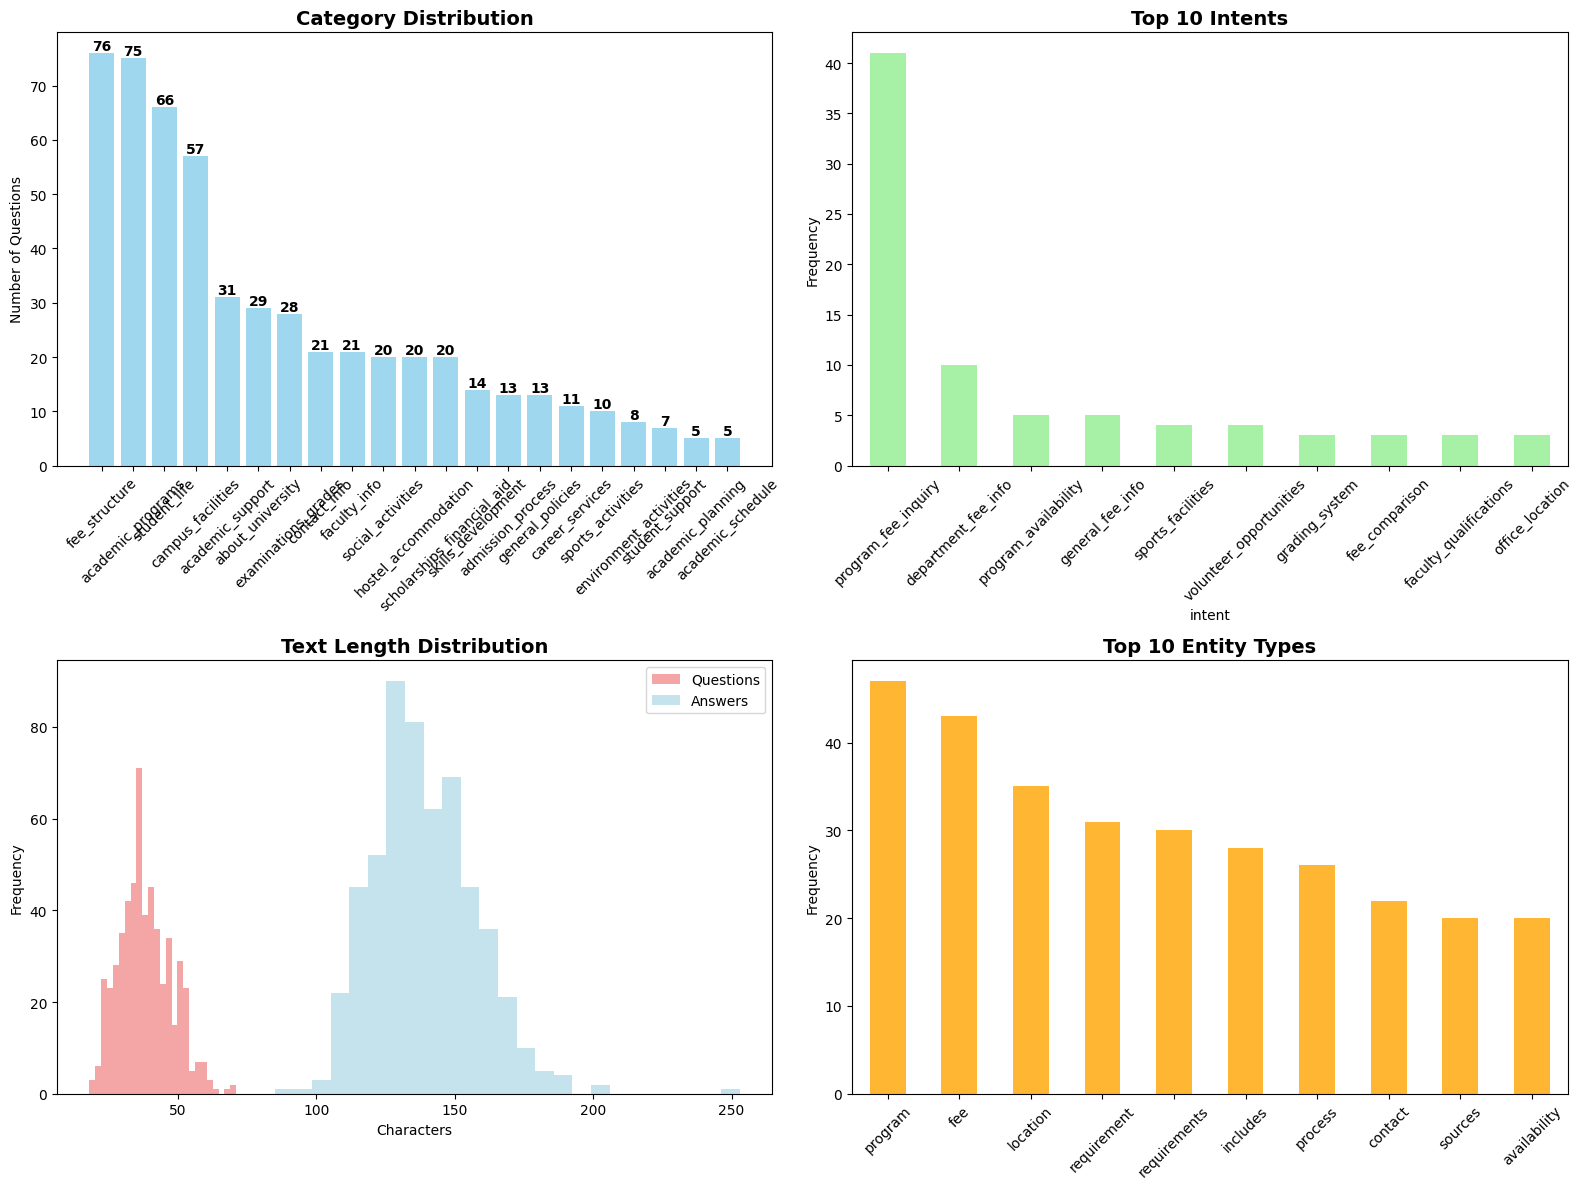

In [5]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
bars1 = axes[0,0].bar(category_counts.index, category_counts.values, color='skyblue', alpha=0.8)
axes[0,0].set_title('Category Distribution', fontweight='bold', fontsize=14)
axes[0,0].set_ylabel('Number of Questions')
axes[0,0].tick_params(axis='x', rotation=45)
for bar in bars1:
    height = bar.get_height()
    axes[0,0].text(bar.get_x() + bar.get_width()/2., height, f'{int(height)}',
                   ha='center', va='bottom', fontweight='bold')

intent_counts.head(10).plot(kind='bar', ax=axes[0,1], color='lightgreen', alpha=0.8)
axes[0,1].set_title('Top 10 Intents', fontweight='bold', fontsize=14)
axes[0,1].set_ylabel('Frequency')
axes[0,1].tick_params(axis='x', rotation=45)

axes[1,0].hist(df['question_length'], bins=25, color='lightcoral', alpha=0.7, label='Questions')
axes[1,0].hist(df['answer_length'], bins=25, color='lightblue', alpha=0.7, label='Answers')
axes[1,0].set_title('Text Length Distribution', fontweight='bold', fontsize=14)
axes[1,0].set_xlabel('Characters')
axes[1,0].set_ylabel('Frequency')
axes[1,0].legend()
entity_series = pd.Series(dict(entity_counts.most_common(10)))
entity_series.plot(kind='bar', ax=axes[1,1], color='orange', alpha=0.8)
axes[1,1].set_title('Top 10 Entity Types', fontweight='bold', fontsize=14)
axes[1,1].set_ylabel('Frequency')
axes[1,1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [14]:
print("📈 DETAILED STATISTICS")
print("="*50)

print("\n🎯 TOP 10 CATEGORIES:")
for i, (category, count) in enumerate(category_counts.head(10).items()):
    print(f"{i+1:2d}. {category:<25} : {count:>3} questions")

print(f"\n🎭 TOP 10 INTENTS:")
for i, (intent, count) in enumerate(intent_counts.head(10).items()):
    print(f"{i+1:2d}. {intent:<30} : {count:>3}")

print(f"\n🔍 TOP 10 ENTITY TYPES:")
for i, (entity, count) in enumerate(entity_counts.most_common(10)):
    print(f"{i+1:2d}. {entity:<20} : {count:>3}")

print(f"\n📏 TEXT LENGTH STATISTICS:")
print(f"  Questions - Avg: {df['question_length'].mean():.1f}, Min: {df['question_length'].min()}, Max: {df['question_length'].max()}")
print(f"  Answers   - Avg: {df['answer_length'].mean():.1f}, Min: {df['answer_length'].min()}, Max: {df['answer_length'].max()}")

print(f"\n✅ DATA QUALITY:")
duplicate_questions = df[df.duplicated('question', keep=False)]
empty_questions = df[df['question'].str.strip() == '']
print(f"  Duplicate Questions: {len(duplicate_questions)}")
print(f"  Empty Questions: {len(empty_questions)}")

📈 DETAILED STATISTICS

🎯 TOP 10 CATEGORIES:
 1. fee_structure             :  76 questions
 2. academic_programs         :  75 questions
 3. student_life              :  66 questions
 4. campus_facilities         :  57 questions
 5. academic_support          :  31 questions
 6. about_university          :  29 questions
 7. examinations_grades       :  28 questions
 8. contact_info              :  21 questions
 9. faculty_info              :  21 questions
10. social_activities         :  20 questions

🎭 TOP 10 INTENTS:
 1. program_fee_inquiry            :  41
 2. department_fee_info            :  10
 3. program_availability           :   5
 4. general_fee_info               :   5
 5. sports_facilities              :   4
 6. volunteer_opportunities        :   4
 7. grading_system                 :   3
 8. fee_comparison                 :   3
 9. faculty_qualifications         :   3
10. office_location                :   3

🔍 TOP 10 ENTITY TYPES:
 1. program              :  47
 2. fee     

In [15]:
print("📋 CATEGORY-WISE BREAKDOWN")
print("="*50)

category_report = []
for category in category_counts.head(8).index:
    category_data = df[df['category'] == category]
    category_intents = category_data['intent'].nunique()

    category_entities = []
    for entities in category_data['entities']:
        if isinstance(entities, dict):
            category_entities.extend(entities.keys())

    category_report.append({
        'Category': category,
        'Samples': len(category_data),
        'Intents': category_intents,
        'Entities': len(set(category_entities)),
        'Avg Q Length': f"{category_data['question_length'].mean():.1f}",
        'Avg A Length': f"{category_data['answer_length'].mean():.1f}"
    })

report_df = pd.DataFrame(category_report)
print(report_df.to_string(index=False))

📋 CATEGORY-WISE BREAKDOWN
           Category  Samples  Intents  Entities Avg Q Length Avg A Length
      fee_structure       76       20        66         41.8        137.3
  academic_programs       75       63        97         36.2        139.0
       student_life       66       62        63         39.5        143.4
  campus_facilities       57       52        77         34.3        131.6
   academic_support       31       31        19         43.3        140.3
   about_university       29       28        46         45.1        169.6
examinations_grades       28       24        37         30.2        124.9
       contact_info       21       17        28         30.0        116.2


🎯 DATASET SUMMARY
Total Samples       : 550
Categories          : 21
Intents             : 431
Entity Types        : 395
Most Common Category: fee_structure (76)
Most Common Intent  : program_fee_inquiry (41)
Avg Question Length : 38.3 chars
Avg Answer Length   : 138.9 chars


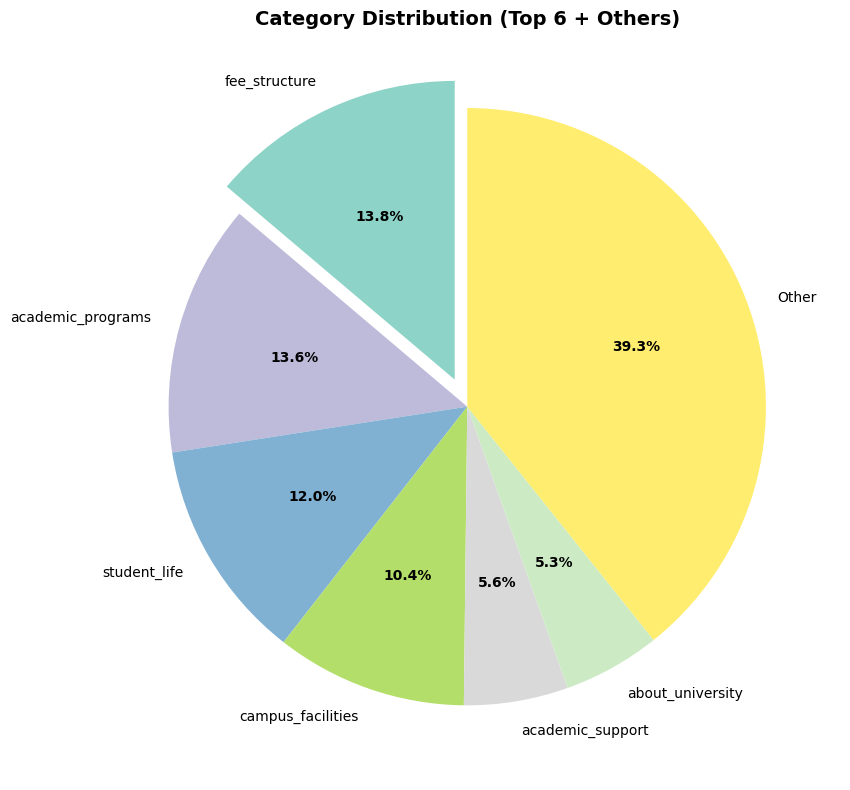

In [16]:

print("🎯 DATASET SUMMARY")
print("="*50)

summary_stats = {
    'Total Samples': len(df),
    'Categories': len(df['category'].unique()),
    'Intents': len(df['intent'].unique()),
    'Entity Types': len(entity_counts),
    'Most Common Category': f"{category_counts.index[0]} ({category_counts.iloc[0]})",
    'Most Common Intent': f"{intent_counts.index[0]} ({intent_counts.iloc[0]})",
    'Avg Question Length': f"{df['question_length'].mean():.1f} chars",
    'Avg Answer Length': f"{df['answer_length'].mean():.1f} chars"
}

for key, value in summary_stats.items():
    print(f"{key:<20}: {value}")
plt.figure(figsize=(10, 8))
top_categories = category_counts.head(6)
other_count = category_counts[6:].sum()
exploded_data = pd.concat([top_categories, pd.Series({'Other': other_count})])

colors = plt.cm.Set3(np.linspace(0, 1, len(exploded_data)))
wedges, texts, autotexts = plt.pie(exploded_data.values, labels=exploded_data.index,
                                   autopct='%1.1f%%', startangle=90, colors=colors,
                                   explode=[0.1 if i == 0 else 0 for i in range(len(exploded_data))])

for autotext in autotexts:
    autotext.set_color('black')
    autotext.set_fontweight('bold')

plt.title('Category Distribution (Top 6 + Others)', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()